Imagine you are working as a data scientist in a big organization which has thousands of employees. The HR department is planning to provide some additional compensation to each working employee which needs to be calculated by looking at the profile of each employee and the benefits they are getting. 

The HR department asks your help if you can use your data science and machine learning skills and calculate an estimated ‘Total Compensation’ for each employee.



Data Description

﻿OGC: Organization Group Code - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police, Fire, Adult Probation, District Attorney, and Sheriff.

OG: Organization Group names

DC: Department Code - Departments are the primary organizational unit used by the City and County of San Francisco. Examples include Recreation and Parks, Public Works, and the Police Department.

Dept: Department name

UC: Union Code - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).

Union: Union names

JF: Job Family - Job Family combines similar Jobs into meaningful groups.

Job: Job name

EI: Employee Identifier

Salaries: Salary of the employee

Overtime: Amounts paid to City employees working in excess of 40 hours per week. 

H/D: Health/Dental - City-paid premiums to health and dental insurance plans covering City employees. To protect confidentiality as legally required, pro-rated citywide averages are presented in lieu of employee-specific health and dental benefits. 

YT: Year Type - Fiscal (July through June) or Calendar (January through December)

Total_Compensation: The final compensation i.e. the sum of all salaries and benefits paid to City employees.



Dataset Link: https://drive.google.com/file/d/1mSkKEe0SUJ7AZHiubxKSke7HWf75JA_Z/view?usp=sharing



# Loading Data

In [56]:
#Importing relevant libraties

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [179]:
#Loading data

df= pd.read_csv('employee_compensation.csv')
df

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079
287832,2015,5,Culture & Recreation,LIB,Public Library,790,"SEIU - Miscellaneous, Local 1021",Library,Librarian 1,790,30704,0,5465.57,Calendar,40174
287833,2014,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669
287834,2013,1,Public Protection,JUV,Juvenile Probation,250,"SEIU - Health Workers, Local 1021",Housekeeping & Laundry,Porter,29266,14425,0,4051.90,Calendar,19594


In [180]:
#reducing columns to only numeric columns for simplicity

df = df[list(df.select_dtypes(include = np.number))]


In [181]:
df

,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation
0,2015,4,250,6725,12196,0,0.00,16158
1,2013,4,39,25058,74639,2820,12703.31,115784
2,2015,6,21,46108,100554,0,12424.50,144708
3,2016,1,911,33369,140164,52754,13043.87,242323
4,2013,2,21,28684,58813,0,7655.28,82106
...,...,...,...,...,...,...,...,...
287831,2016,3,535,9610,78980,30115,13068.80,147079
287832,2015,5,790,790,30704,0,5465.57,40174
287833,2014,2,6,38352,104451,0,13054.94,164669
287834,2013,1,250,29266,14425,0,4051.90,19594


# Data Wrangling and Visualization

In [182]:
#Dropping duplicates to minimise the effect of overfitting

df.drop_duplicates()
df

,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation
0,2015,4,250,6725,12196,0,0.00,16158
1,2013,4,39,25058,74639,2820,12703.31,115784
2,2015,6,21,46108,100554,0,12424.50,144708
3,2016,1,911,33369,140164,52754,13043.87,242323
4,2013,2,21,28684,58813,0,7655.28,82106
...,...,...,...,...,...,...,...,...
287831,2016,3,535,9610,78980,30115,13068.80,147079
287832,2015,5,790,790,30704,0,5465.57,40174
287833,2014,2,6,38352,104451,0,13054.94,164669
287834,2013,1,250,29266,14425,0,4051.90,19594


In [183]:
#checikng corelation between the target and explanatory variables 

df.corr()['Total_Compensation']

Year                  0.005986
OGC                  -0.270160
UC                   -0.032338
EI                   -0.003966
Salaries              0.972585
Overtime              0.453497
H/D                   0.806283
Total_Compensation    1.000000
Name: Total_Compensation, dtype: float64

<AxesSubplot:xlabel='Total_Compensation'>

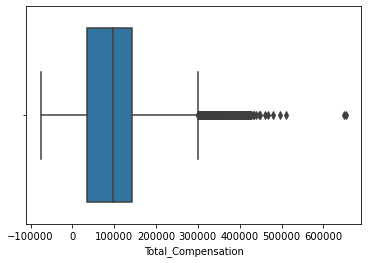

In [184]:
#Checking for outliers

sns.boxplot(x= df['Total_Compensation'])

In [185]:
#Removing outliers

q0 = df['Total_Compensation'].quantile(0.99)

df = df[df['Total_Compensation'] < q0]

<AxesSubplot:xlabel='Total_Compensation'>

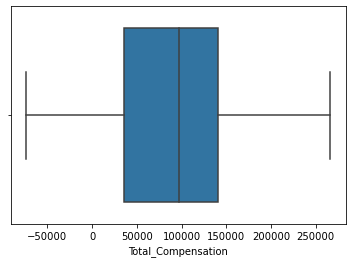

In [186]:
#Outliers eliminated

sns.boxplot(x= df['Total_Compensation'])

<AxesSubplot:xlabel='Salaries', ylabel='Total_Compensation'>

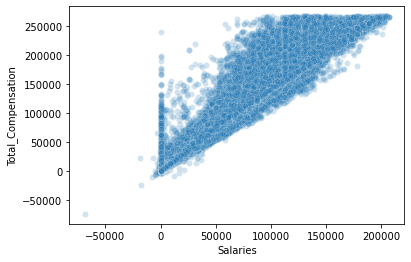

In [187]:
#plotting scatterplot of Salaries against target (it has high co relation factor)

sns.scatterplot(data = df, x= 'Salaries', y= 'Total_Compensation', alpha = 0.2)

<AxesSubplot:xlabel='H/D'>

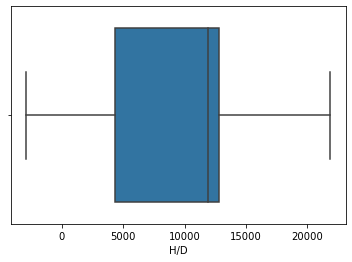

In [188]:
#Checking for outliers

sns.boxplot(x= df['H/D'])

<AxesSubplot:xlabel='H/D', ylabel='Total_Compensation'>

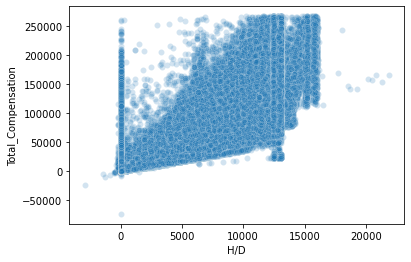

In [189]:
#plotting scatterplot of H/D against target (it has high co relation factor)

sns.scatterplot(data = df, x= 'H/D', y= 'Total_Compensation', alpha = 0.2)

In [194]:
#Eliminating less corelated values

df.drop(['EI', 'Year', 'UC'], axis = 1, inplace = True)

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [195]:
df

,OGC,Salaries,Overtime,H/D,Total_Compensation
0,4,12196,0,0.00,16158
1,4,74639,2820,12703.31,115784
2,6,100554,0,12424.50,144708
3,1,140164,52754,13043.87,242323
4,2,58813,0,7655.28,82106
...,...,...,...,...,...
287831,3,78980,30115,13068.80,147079
287832,5,30704,0,5465.57,40174
287833,2,104451,0,13054.94,164669
287834,1,14425,0,4051.90,19594


# Data Preprocessing and Model Creation

In [223]:
#Importing relevant ML libraries and methods

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
import time

In [232]:
#Some preprocessing

X= df.drop('Total_Compensation', axis = 1)
y= df.Total_Compensation

scaler = StandardScaler()

scaled_X = scaler.fit_transform(X)
scaled_y = scaler.fit_transform(np.array(y).reshape(-1,1))

In [233]:
#the shapes of both variables

scaled_X.shape, scaled_y.shape

((284957, 4), (284957, 1))

In [234]:
#Train test split to check our model accuracy 

X_train, X_test, y_train, y_test = tts(scaled_X, scaled_y, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227965, 4), (56992, 4), (227965, 1), (56992, 1))

In [254]:
#Our model creation

my_model = LinearRegression()

start = time.time()

my_model.fit(X_train, y_train)
accuracy = my_model.score(X_test, y_test)

end = time.time()

In [258]:
#Accuracy of our model
accuracy

0.9875955067074981

In [259]:
print('time taken for Linear Regression model is : ', end-start)
print('the accuracy of Linear Regression model is : ', accuracy)

time taken for Linear Regression model is :  0.13600778579711914
the accuracy of Linear Regression model is :  0.9875955067074981


In [239]:
# We got good accuracy within good time complexity !

Text(0, 0.5, 'Actual Values')

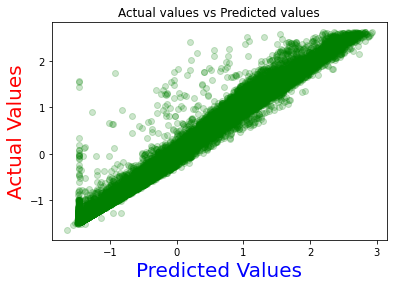

In [240]:
#Graph between actual and predicted values if the graph aligns with 45 degree line our model is perfect

plt.title('Actual values vs Predicted values')
plt.scatter(x= y_hat.flatten(), y= y_test.flatten(), color = 'g', alpha = 0.2)
plt.xlabel('Predicted Values', size= 20, color = 'b')
plt.ylabel('Actual Values', size= 20, color = 'r')

In [241]:
# Yayy! we acheived a good level of accuracy

In [242]:
#APPENDIX

In [243]:
#Lets try with different ML models and lets check who got better accuracy

In [244]:
#Decision Tree algorithm

from sklearn.tree import DecisionTreeRegressor

my_tree = DecisionTreeRegressor()

In [247]:
start = time.time()

my_tree.fit(X_train, y_train)
accuracy = my_tree.score(X_test, y_test)

end = time.time()

In [248]:
print('time taken for decision Tree: ', end-start)
print ('the accuracy of Decision Tree model is :', accuracy)

time taken for decision Tree:  4.906565189361572
the accuracy of Decision Tree model is : 0.9830644778067791


In [249]:
#We got 97% accuracy

In [250]:
#K Nearest Neighbors algorithm

from sklearn.neighbors import KNeighborsRegressor

my_KNN = KNeighborsRegressor()

In [251]:
start = time.time()

my_KNN.fit(X_train, y_train)
accuracy = my_KNN.score(X_test, y_test)

end = time.time()

In [252]:
print('time taken for KNN Tree: ', end-start)
print('the accuracy of KNN model is : ', accuracy)

time taken for KNN Tree:  75.9038736820221
the accuracy of KNN model is :  0.9892777003082657


In [ ]:
#We got 98.3 % accuracy, but still This model is not preferable because Time taken is longer

In [260]:
#By taking Accuracy and Time complexity into considerations Linear regression is most preferable than Decision Tree and KNN

# Thank You